# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

**2.1.1 Answer** 1. n_estimators = # of trees in the forest. If there's too few trees for the number of observations, then some observations will be predicted only once or maybe not even. Vice versa, if there's too many trees for the number of observations, then some features can be missed in all subspaces used. I.e. both instances results in decreased predictive power of RF. It's also more computionally heavy the more trees you have.

2. Max_depth = Maximum depth of the tree. Deeper trees reduces the bias and the variance. Thus making it a trade off between the two.

3. \# Features: Usually, the more features you have, the greater the prediction of the model. However, the correlation between features also increases.  

4. If bootstrap = False, then the whole dataset is used to build each tree. Meaning whether each generated decision tree is based on a bootstraped sample of the full data set. Bootstraping increases the independence of each tree, why it's default when doing random forest.

> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

**2.1.2 Answer** When n_estimaters are greater than one, there are more than one decesion trees. To have only identical trees have max_features equal 1 and bootstrap to False. Thus each decision tree is generated from the same data, and the decesion trees will be the same. This approach may lead to overfitting, as only one feature is considered.

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

In [31]:
# Solution
# Importing data and libaries 
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap

# Get wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

n_components = 2 #Number of components

### Wine data

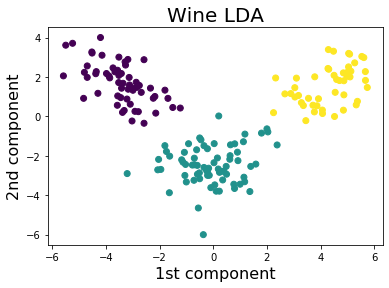

In [32]:
# LDA
lda = lda(n_components = n_components)
X_lda = lda.fit_transform(X_wine, y_wine)

#plot
fig = plt.scatter(x=X_lda[:,0], y=X_lda[:,1], c=y_wine)
fig = plt.title("Wine LDA", fontsize=20)
fig = plt.xlabel("1st component", fontsize=16)
fig = plt.ylabel("2nd component", fontsize=16)
plt.show(fig)

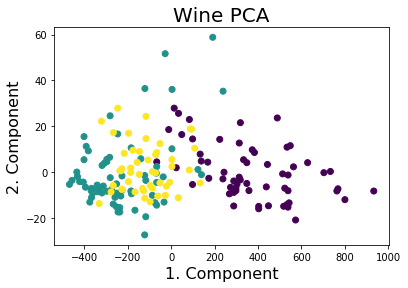

In [16]:
#PCA 
X_wine_pca = PCA().fit_transform(X_wine)[:, :2]

# plot 
fig1 = plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c=y_wine)
fig1 = plt.title('Wine PCA', fontsize=20)
fig1 = plt.xlabel('1. Component', fontsize=16)
fig1 = plt.ylabel('2. Component', fontsize=16)
plt.show(fig1)

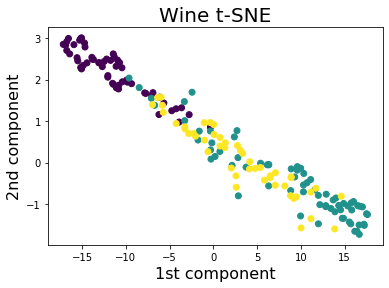

In [33]:
#TSNE 
tsne = TSNE(n_components=n_components)
X_tsne = tsne.fit_transform(X_wine, y_wine)

#plot
fig2 = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_wine)
fig2 = plt.title("Wine t-SNE", fontsize=20)
fig2 = plt.xlabel("1st component", fontsize=16)
fig2 = plt.ylabel("2nd component", fontsize=16)
plt.show(fig2)

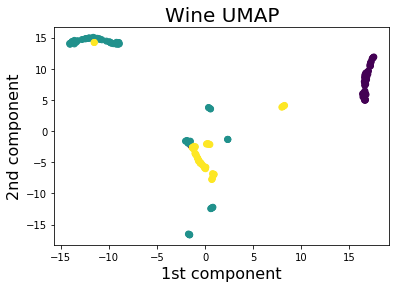

In [18]:
#UMAP
reducer = umap.UMAP()
X_umap = reducer.fit_transform(X_wine, y_wine)

#Plot
fig6 = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_wine)
fig6 = plt.title("Wine UMAP", fontsize=20)
fig6 = plt.xlabel("1st component", fontsize=16)
fig6 = plt.ylabel("2nd component", fontsize=16)
plt.show(fig6)

### Standardized wine 

In [21]:
# Scaling the wine data
scaler       = StandardScaler()
X_wine_std   = StandardScaler().fit_transform(X_wine)

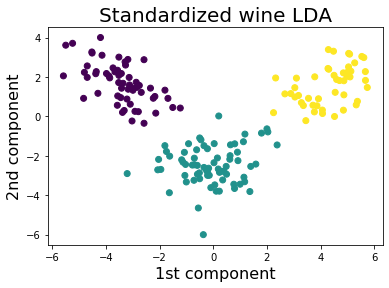

In [35]:
X_lda_std = lda.fit_transform(X_wine_std, y_wine)

#plot
fig9 = plt.scatter(x=X_lda_std[:,0], y=X_lda_std[:,1], c=y_wine)
fig9 = plt.title("Standardized wine LDA", fontsize=20)
fig9 = plt.xlabel("1st component", fontsize=16)
fig9 = plt.ylabel("2nd component", fontsize=16)
plt.show(fig9)

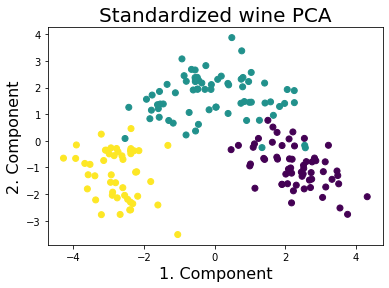

In [36]:
#PCA 
X_wine_std_pca = PCA().fit_transform(X_wine_std)[:, :2]

# plot 
fig10 = plt.scatter(X_wine_std_pca[:, 0], X_wine_std_pca[:, 1], c=y_wine)
fig10 = plt.title('Standardized wine PCA', fontsize=20)
fig10 = plt.xlabel('1. Component', fontsize=16)
fig10 = plt.ylabel('2. Component', fontsize=16)
plt.show(fig10)

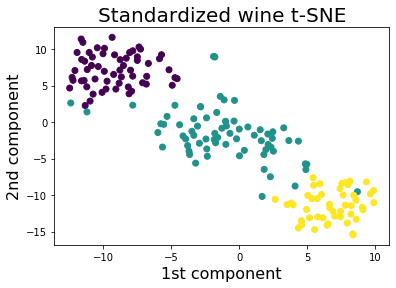

In [37]:
#TSNE 
X_tsne_std = tsne.fit_transform(X_wine_std, y_wine)

#plot
fig11 = plt.scatter(X_tsne_std[:, 0], X_tsne_std[:, 1], c=y_wine)
fig11 = plt.title("Standardized wine t-SNE", fontsize=20)
fig11 = plt.xlabel("1st component", fontsize=16)
fig11 = plt.ylabel("2nd component", fontsize=16)
plt.show(fig11)

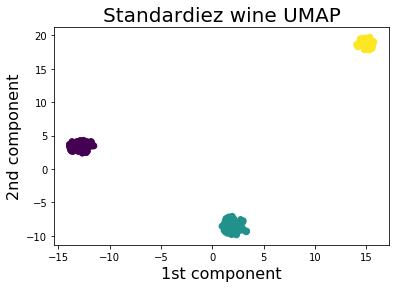

In [38]:
#UMAP
reducer = umap.UMAP()
X_umap_std = reducer.fit_transform(X_wine_std, y_wine)

#Plot
fig12 = plt.scatter(X_umap_std[:, 0], X_umap_std[:, 1], c=y_wine)
fig12 = plt.title("Standardiez wine UMAP", fontsize=20)
fig12 = plt.xlabel("1st component", fontsize=16)
fig12 = plt.ylabel("2nd component", fontsize=16)
plt.show(fig12)

### Digits

C:\Users\Anders\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


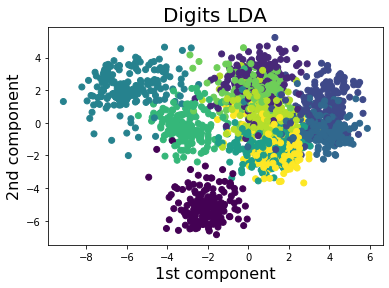

In [8]:
#LDA
X_lda_digits = lda.fit_transform(X_digits, y_digits)

#plot
fig3 = plt.scatter(x=X_lda_digits[:,0], y=X_lda_digits[:,1], c=y_digits)
fig3 = plt.title("Digits LDA", fontsize=20)
fig3 = plt.xlabel("1st component", fontsize=16)
fig3 = plt.ylabel("2nd component", fontsize=16)
plt.show(fig3)

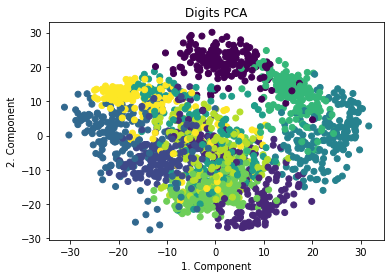

In [9]:
#PCA 
X_digits_pca = PCA().fit_transform(X_digits)[:, :2]

# plot 
fig4 = plt.scatter(X_digits_pca[:, 0], X_digits_pca[:, 1], c=y_digits)
fig4 = plt.title('Digits PCA', fontsize=20)
fig4 = plt.xlabel('1. Component', fontsize=16)
fig4 = plt.ylabel('2. Component', fontsize=16)
plt.show(fig4)

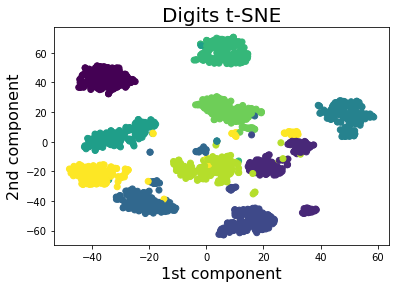

In [10]:
#TSNE
X_tsne_D = tsne.fit_transform(X_digits, y_digits)

#plot
fig5 = plt.scatter(X_tsne_D[:, 0], X_tsne_D[:, 1], c=y_digits)
fig5 = plt.title("Digits t-SNE", fontsize=20)
fig5 = plt.xlabel("1st component", fontsize=16)
fig5 = plt.ylabel("2nd component", fontsize=16)
plt.show(fig5)

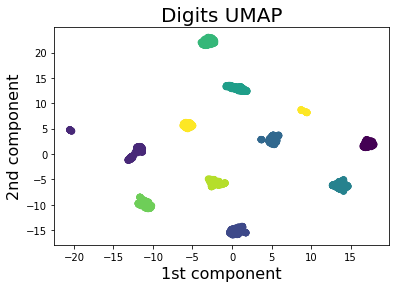

In [12]:
#UMAP
reducer = umap.UMAP()
X_umap_D = reducer.fit_transform(X_digits, y_digits)

#Plot
fig7 = plt.scatter(X_umap_D[:, 0], X_umap_D[:, 1], c=y_digits)
fig7 = plt.title("Digits UMAP", fontsize=20)
fig7 = plt.xlabel("1st component", fontsize=16)
fig7 = plt.ylabel("2nd component", fontsize=16)
plt.show(fig7)

**Comments on dimensionality reduction**
Most machine learning algorithms work better when features are on a relatively similar scale and close to Gaussian distribution. The wine dataset has outliers and is skewed, thus making it difficult for ML algorithms to converge. The digits dataset has fairly small outliers and is near a Gaussian distribution, which makes it easy digestible for the algorithms. Standardizing the data removes outliers, and makes the data normally distributed with a mean zero and unit variance. This makes machine learning algorithms converge quicker. One might say standardizing and scaling help features arrive in a more digestible form for the algorithms

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

**4.2.1. Answer**
Honest tree is imposing a separation between constructing the partition and estimating effect within leaves of the partition, using separate samples for the two tasks. Honest estimation differs from adaptive estimation where the same data are used to build the partition and estimate leaf effects. Cf. Athey, Imbens (2015).

- Honesty is required to get good local treatment effect estimates because, "honesty has the implication that the asymptotic properties of treatment effect estimates within the partitions are the same as if the partition had been exogenously given. However, there's a loss of precision due to sample splitting (which reduces sample size in each step of estimation), there's a benefit in terms of eliminating bias which offsets at least part of the cost. Overall honesty reduces the mean squared errors significantly." According to Athey and Imbens.

- The decision tree algorithm partitioning on the largest impurity in treatment effect among the individuals in the node. So if one naievely estimate the local treatment on the same individuals as used to create the decision tress, one would obtain a biased treatment effect by construction. Therefore, it's a preferable approach to leave a group of untouched individuals, such that one can estimate the local treatment effect after the creation of the decision trees. As the group is random, i.e. independent of the training set used for decision tree classification, the bias converges to 0.  